In [1]:
#--------------------------------------------------------------------------------------------------------
#Project:
#Image Classification with Convolutional Neural Network (CNN) using CIFAR-10 Dataset.


#Team Member:
#Name: Smit Rajeshkumar Patel
#Student ID: 030975566
#Email ID: SmitRajeshkumar.Patel01@student.csulb.edu


# MODEL 1
#--------------------------------------------------------------------------------------------------------

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix

In [3]:
# Loading Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 143s 1us/step


In [4]:
# Dataset Overview
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("Number of training labels:", y_train.shape[0])
print("Number of testing labels:", y_test.shape[0])

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)
Number of training labels: 50000
Number of testing labels: 10000


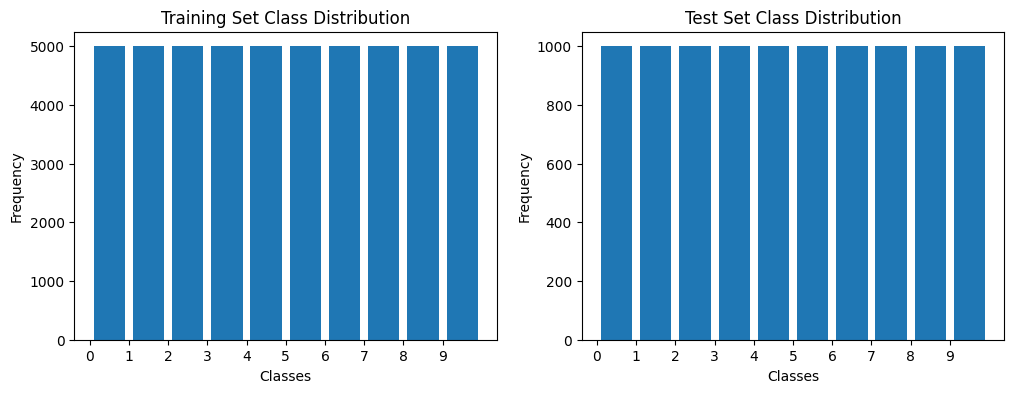

In [5]:
# Display class distribution in the training and test sets
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(y_train, bins=range(11), rwidth=0.8)
axs[0].set_title('Training Set Class Distribution')
axs[0].set_xticks(np.arange(10))
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Frequency')

axs[1].hist(y_test, bins=range(11), rwidth=0.8)
axs[1].set_title('Test Set Class Distribution')
axs[1].set_xticks(np.arange(10))
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Frequency')
plt.show()

In [6]:
# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Model Construction
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [8]:
# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

In [9]:
# Model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [10]:
# Fit the model
history = model_1.fit(x_train, y_train, epochs=45, validation_data=(x_test, y_test))

Epoch 1/45
1563/1563 [==============================] - 15s 6ms/step - loss: 1.4685 - accuracy: 0.4725 - precision: 0.7048 - recall: 0.2399 - val_loss: 1.1802 - val_accuracy: 0.5862 - val_precision: 0.7656 - val_recall: 0.3775
Epoch 2/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1241 - accuracy: 0.6080 - precision: 0.7576 - recall: 0.4434 - val_loss: 1.0635 - val_accuracy: 0.6280 - val_precision: 0.7661 - val_recall: 0.4683
Epoch 3/45
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0001 - accuracy: 0.6502 - precision: 0.7765 - recall: 0.5187 - val_loss: 1.0421 - val_accuracy: 0.6418 - val_precision: 0.7492 - val_recall: 0.5225
Epoch 4/45
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9186 - accuracy: 0.6805 - precision: 0.7908 - recall: 0.5673 - val_loss: 0.9867 - val_accuracy: 0.6611 - val_precision: 0.7776 - val_recall: 0.5375
Epoch 5/45
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8437 - accuracy: 

In [11]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model_1.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

313/313 [==============================] - 1s 3ms/step - loss: 2.8380 - accuracy: 0.6610 - precision: 0.6677 - recall: 0.6578
Test Accuracy: 0.6610000133514404
Test Precision: 0.6677494645118713
Test Recall: 0.657800018787384


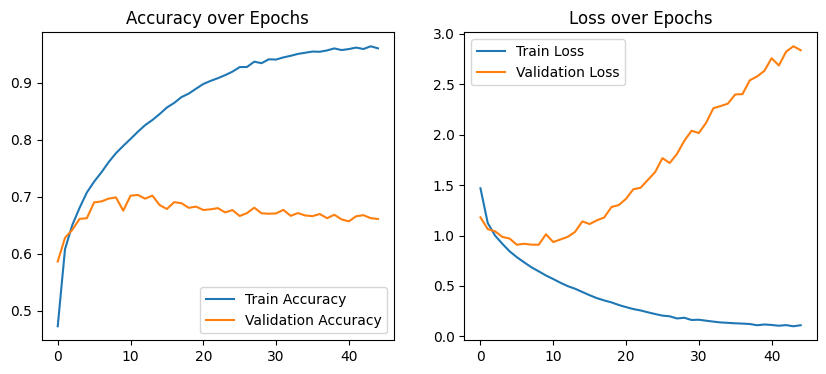

In [12]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [13]:
# Predictions for confusion matrix
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


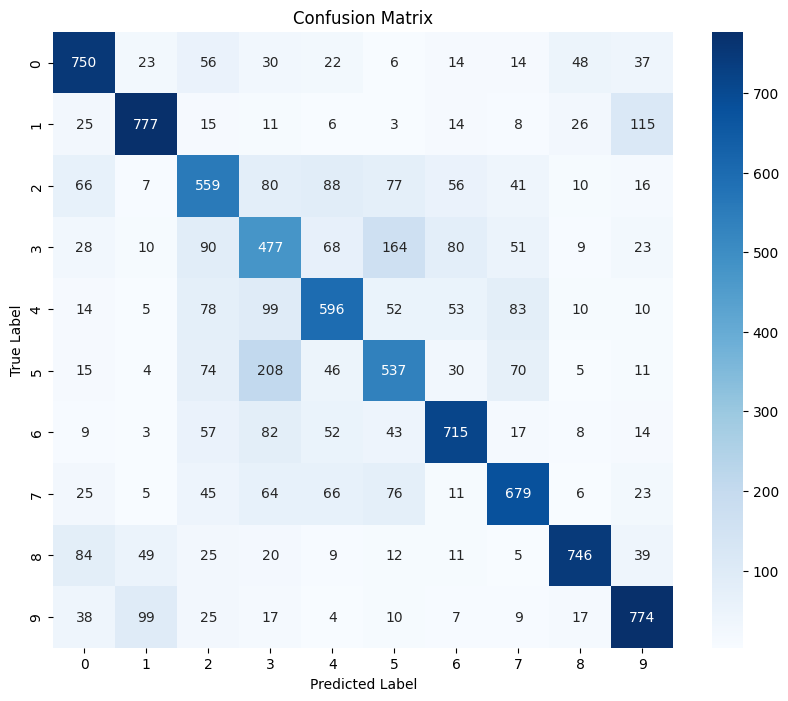

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()